# Demo-1: Autoencoders and GANs



# Step-1: Import TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


# Step-2: Define Encoded Representation Size

In [ ]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


# Step-3: Compile the Autoencoder

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.2760 - val_loss: 0.1881
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1696 - val_loss: 0.1535
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1442 - val_loss: 0.1340
Epoch 4/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1288 - val_loss: 0.1216
Epoch 5/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1185 - val_loss: 0.1133
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1114 - val_loss: 0.1073
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1062 - val_loss: 0.1029
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1023 - val_loss: 0.0995
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0995 - val_loss: 0.0971
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0976 - val_los

# Step-4: Encode and Decode Digits

313/313 [==============================] - 0s 1ms/step


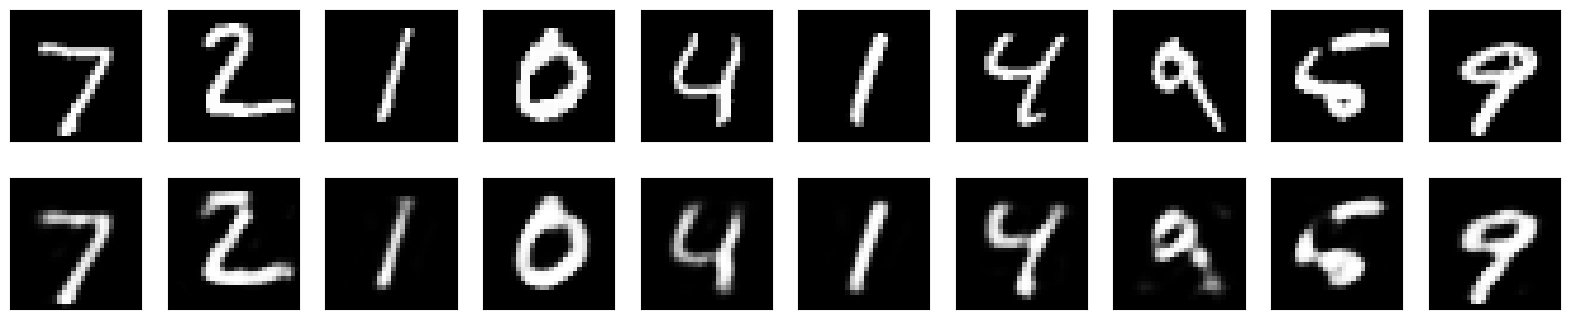

In [ ]:
# Encode and decode some digits
encoded_imgs = autoencoder.predict(x_test)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
